In [2]:
import sys
sys.path.append('../scr') 

In [3]:
from ppgfilter import PPGFilter
from model import StressIndex
import pandas as pd
import matplotlib.pyplot as plt


Reading data

In [4]:
data = pd.read_csv('./test_data.csv')

ppg_fr = 256
sec_with = 1000
num_sec = 90

ppg = data["afe_LED1ABSVAL"][sec_with * ppg_fr: (sec_with + num_sec) * ppg_fr]

Creating the filter

In [5]:
ppg_filter = PPGFilter()
filt_ppg, _ = ppg_filter.filter(ppg=ppg, ppg_fr=256)

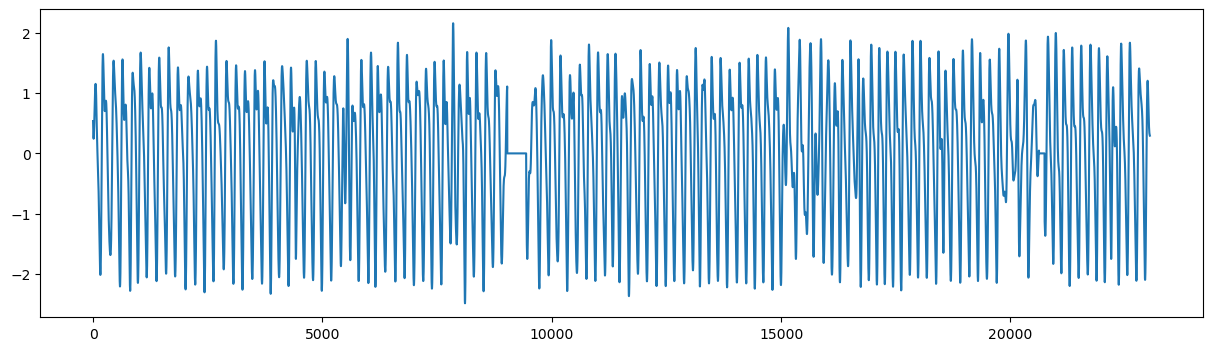

In [6]:
plt.figure(figsize=(15, 4))
plt.plot(filt_ppg)
plt.show()

Creating an object for predicting stress levels

In [7]:
path_to_model = '../scr/catboost_model.cbm'
model = StressIndex(path_to_model)
model.predict(filt_ppg, 256)

array([1.54901681, 1.41179247, 1.7238636 , 1.85586651, 1.5536574 ,
       1.54266153, 1.86186753, 2.16699536, 1.94853246, 1.84450564])

The output is an array where each value is a stress index for one window.